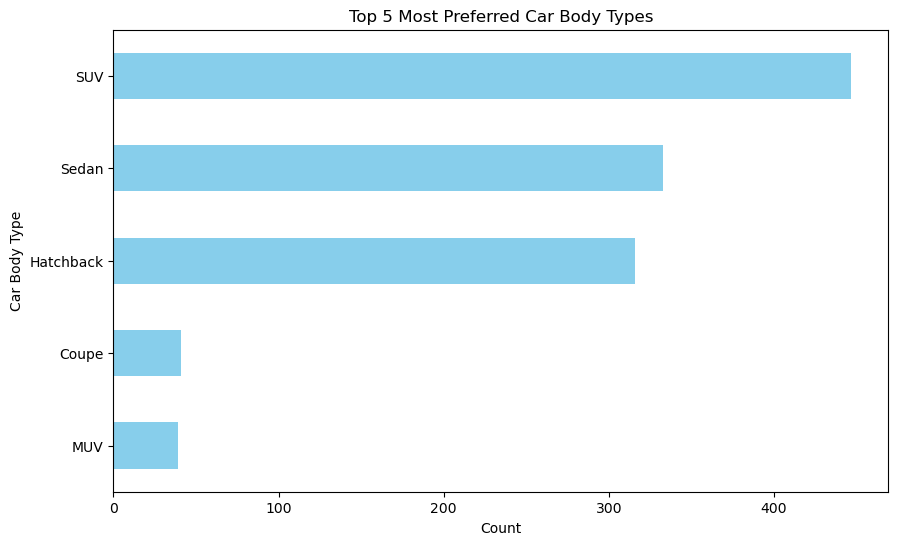

In [1]:
#Task 1
#A car manufacturer wants to introduce a new car and
#requires information about the top 5 most preferred car body types. Display the results using a horizontal bar chart.

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')

body_type_counts = data['Body_Type'].value_counts().head(5)

plt.figure(figsize=(10, 6))
body_type_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Car Body Type')
plt.title('Top 5 Most Preferred Car Body Types')
plt.gca().invert_yaxis()  # Invert y axis to have the highest count on top
plt.show()

In [5]:
#Task 2
#List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode.
#How many cars have all the above-mentioned features?

driving_conditions = ['Normal', 'Comfort', 'Eco', 'Sport', 'Power']
cars_with_all_modes = data.dropna(subset=['Drive_Modes'])

cars_with_all_modes_list = cars_with_all_modes[cars_with_all_modes['Drive_Modes'].apply(lambda x: all(mode in x for mode in driving_conditions))]
cars_with_all_modes_count = cars_with_all_modes_list.shape[0]
cars_with_all_modes_list, cars_with_all_modes_count

(     S. No.  Make Model                    Variant  Displacement  Cylinders  \
 321     321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
 330     330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   
 
      Valves_Per_Cylinder  Fuel_Tank_Capacity_litre Fuel_Type  Height_mm  ...  \
 321                  4.0                      85.0    Petrol     1740.0  ...   
 330                  4.0                      82.0    Petrol     1485.0  ...   
 
      Central_Locking  Child_Safety_Locks Hill_Assist  \
 321              Yes                 Yes         Yes   
 330              Yes                 Yes         Yes   
 
                                  Drive_Modes  High_Speed_Alert_System  \
 321  Normal, Comfort, Eco, Sport, Power Mode                      Yes   
 330  Normal, Comfort, Eco, Sport, Power Mode                      Yes   
 
      ABS_(Anti-lock_Braking_System) Gross_Vehicle_Weight  \
 321                             Yes              2830 

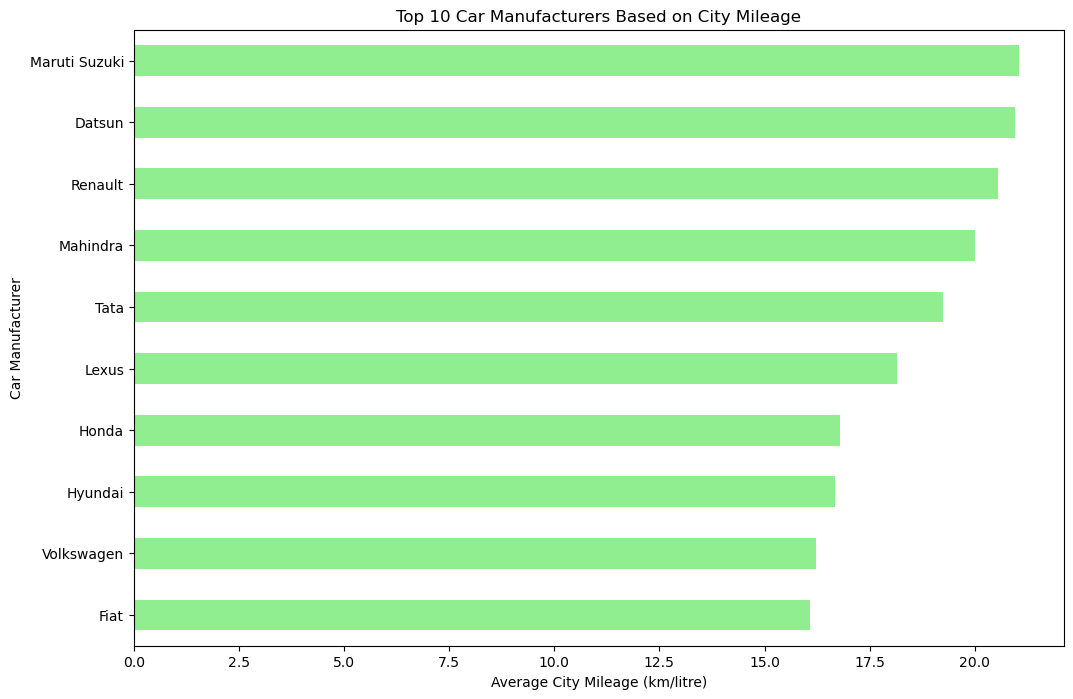

Make
Maruti Suzuki    21.062826
Datsun           20.946667
Renault          20.554286
Mahindra         20.003763
Tata             19.233542
Lexus            18.150000
Honda            16.805714
Hyundai          16.679853
Volkswagen       16.225000
Fiat             16.090909
Name: City_Mileage_km_litre, dtype: float64

In [7]:
#Task 3
#Identify the top 10 car manufacturers based on the city mileage and display the result using a horizontal 
#bar graph with the manufacturer on the y-axis and mileage on the x-axis.
#Do you notice any outliers in the above output? If yes, what is the reason, and how would you resolve it?

avg_city_mileage = data.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
avg_city_mileage.plot(kind='barh', color='lightgreen')
plt.xlabel('Average City Mileage (km/litre)')
plt.ylabel('Car Manufacturer')
plt.title('Top 10 Car Manufacturers Based on City Mileage')
plt.gca().invert_yaxis()  # Invert y axis to have the highest average mileage on top
plt.show()

avg_city_mileage


#interpretation : No significant outliers are immediately visible in the plot; the values seem to follow a consistent descending order.




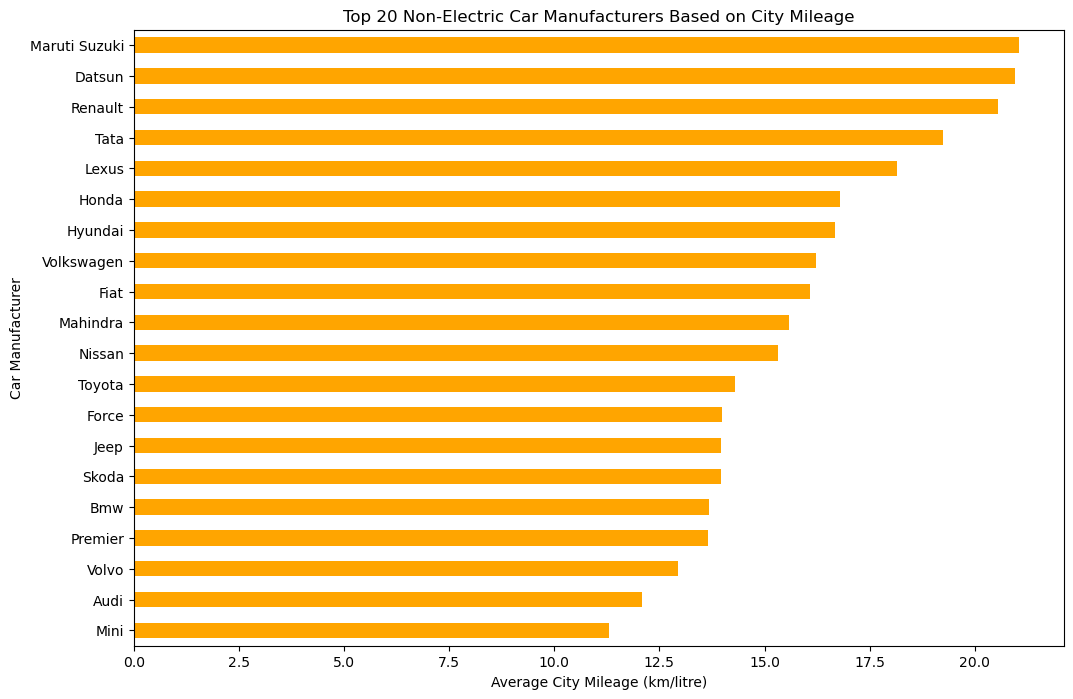

Make
Maruti Suzuki    21.062826
Datsun           20.946667
Renault          20.554286
Tata             19.233542
Lexus            18.150000
Honda            16.805714
Hyundai          16.679853
Volkswagen       16.225000
Fiat             16.090909
Mahindra         15.572159
Nissan           15.324375
Toyota           14.293065
Force            14.000000
Jeep             13.975000
Skoda            13.953333
Bmw              13.686875
Premier          13.666667
Volvo            12.953077
Audi             12.081250
Mini             11.300000
Name: City_Mileage_km_litre, dtype: float64

In [9]:
#Task 4
#Identify the top 20 non-electric car manufacturers based on city mileage and display the results using a bar graph similar to that in task 1.

non_electric_cars = data[data['Fuel_Type'] != 'Electric']

avg_city_mileage_non_electric = non_electric_cars.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
avg_city_mileage_non_electric.plot(kind='barh', color='orange')
plt.xlabel('Average City Mileage (km/litre)')
plt.ylabel('Car Manufacturer')
plt.title('Top 20 Non-Electric Car Manufacturers Based on City Mileage')
plt.gca().invert_yaxis()  # Invert y axis to have the highest average mileage on top
plt.show()

avg_city_mileage_non_electric

In [21]:
#Task 5
#Display the car mileages for the following four companies using a pivot table:
#Hyundai, Mahindra, Renault, and Skoda
#Create 4 separate pivot tables capturing the following details:
#1. Mean of city mileage
#2. Median of city mileage
#3. Mean of highway mileage
#4. Median of highway mileage

filtered_data = data[data['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])]
pivot_mean_city_mileage = filtered_data.pivot_table(values='City_Mileage_km_litre', index='Make', aggfunc='mean')
pivot_median_city_mileage = filtered_data.pivot_table(values='City_Mileage_km_litre', index='Make', aggfunc='median')
pivot_mean_highway_mileage = filtered_data.pivot_table(values='Highway_Mileage_km_litre', index='Make', aggfunc='mean')
pivot_median_highway_mileage = filtered_data.pivot_table(values='Highway_Mileage_km_litre', index='Make', aggfunc='median')


pivot_mean_city_mileage, pivot_median_city_mileage, pivot_mean_highway_mileage, pivot_median_highway_mileage
#interpretation: The output suggest that Renault performs well in city conditions, while Hyundai is more efficient on highways.

(          City_Mileage_km_litre
 Make                           
 Hyundai               16.679853
 Mahindra              20.003763
 Renault               20.554286
 Skoda                 13.953333,
           City_Mileage_km_litre
 Make                           
 Hyundai                   16.38
 Mahindra                  16.00
 Renault                   21.04
 Skoda                     14.50,
           Highway_Mileage_km_litre
 Make                              
 Hyundai                  18.294146
 Mahindra                 18.140175
 Renault                  17.690000
 Skoda                    17.268529,
           Highway_Mileage_km_litre
 Make                              
 Hyundai                      18.50
 Mahindra                     17.21
 Renault                      19.60
 Skoda                        16.00)

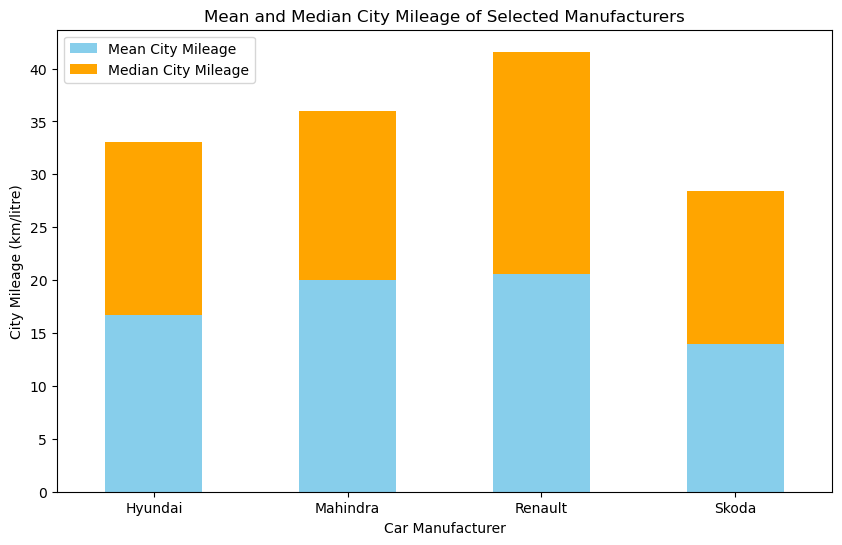

In [27]:
#Task 6
#Display the mean and median values of city mileages of the following manufacturers,
#using a stacked column chart: Hyundai, Renault, Mahindra, and Skoda

import matplotlib.pyplot as plt
mean_city_mileage = filtered_data.groupby('Make')['City_Mileage_km_litre'].mean()
median_city_mileage = filtered_data.groupby('Make')['City_Mileage_km_litre'].median()

city_mileage_summary = pd.DataFrame({
    'Mean City Mileage': mean_city_mileage,
    'Median City Mileage': median_city_mileage
})

city_mileage_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.xlabel('Car Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Mean and Median City Mileage of Selected Manufacturers')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Interpretation: The stacked column chart shows that Renault has the highest mean and median city mileage among the selected manufacturers, while Hyundai has the lowest. This indicates that Renault's cars are generally more efficient in city driving conditions compared to Hyundai's.

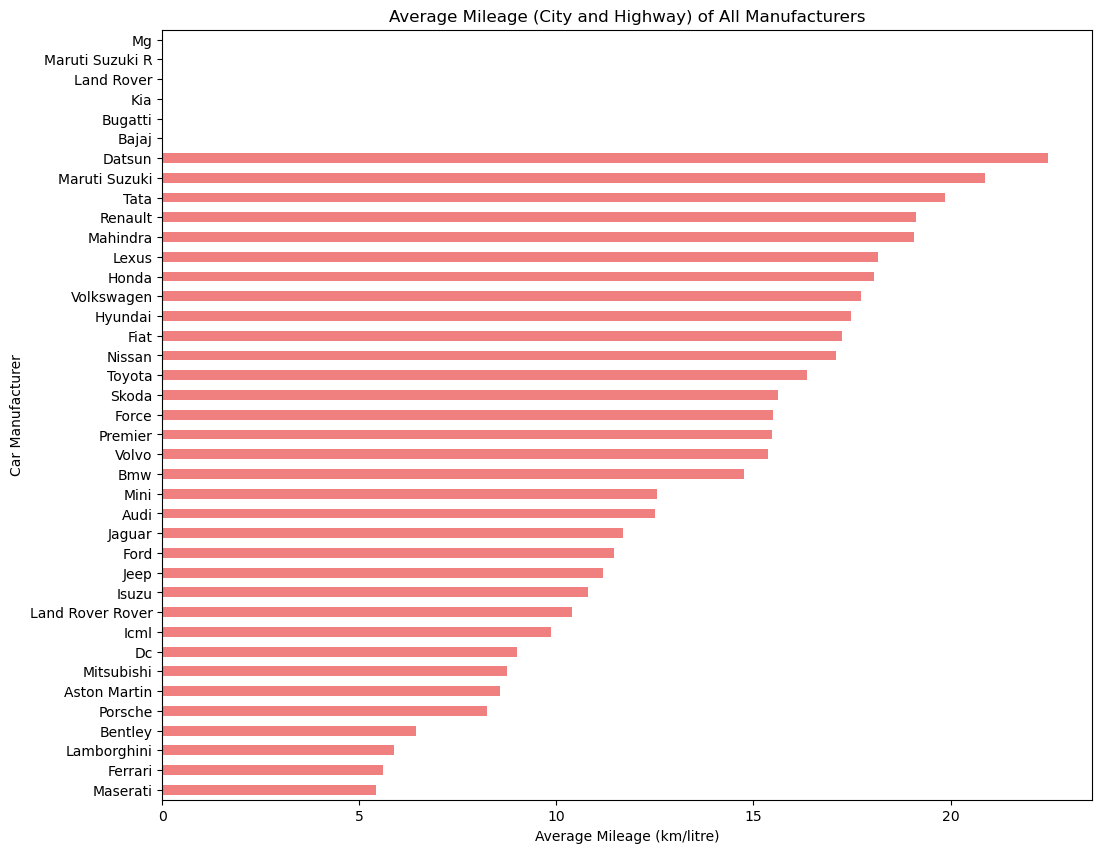

In [29]:
#Task 7
#Display the average mileage (city and highway) of all manufacturers using a horizontal bar chart, in ascending order of mileage.

avg_mileage = data.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean()
avg_mileage['Average_Mileage'] = avg_mileage.mean(axis=1)
avg_mileage_sorted = avg_mileage['Average_Mileage'].sort_values()
plt.figure(figsize=(12, 10))
avg_mileage_sorted.plot(kind='barh', color='lightcoral')
plt.xlabel('Average Mileage (km/litre)')
plt.ylabel('Car Manufacturer')
plt.title('Average Mileage (City and Highway) of All Manufacturers')
plt.show()

Interpretation: The horizontal bar chart displays the average mileage (city and highway combined) for all car manufacturers in ascending order. This allows for an easy comparison of overall fuel efficiency across different brands. ​

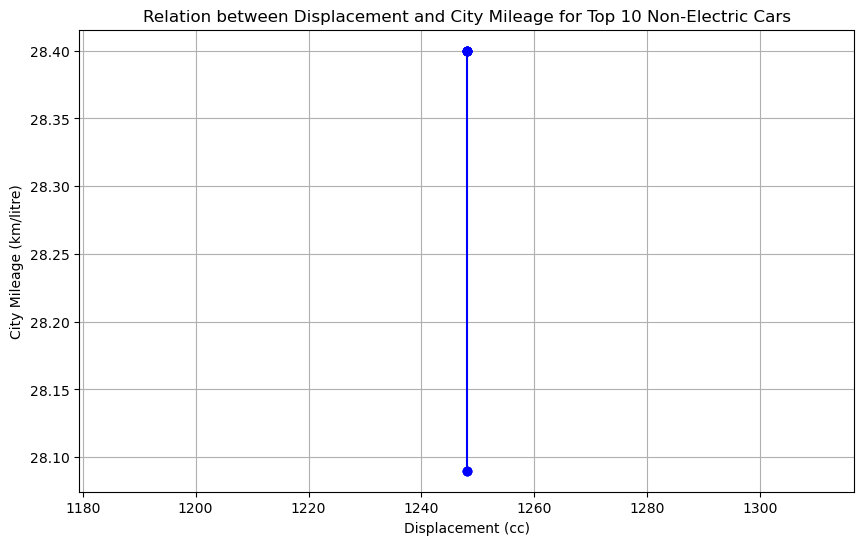

,Make,Model,Displacement,City_Mileage_km_litre
155,Maruti Suzuki,Dzire,1248.0,28.40
157,Maruti Suzuki,Dzire,1248.0,28.40
159,Maruti Suzuki,Dzire,1248.0,28.40
160,Maruti Suzuki,Dzire,1248.0,28.40
164,Maruti Suzuki,Dzire,1248.0,28.40
165,Maruti Suzuki,Dzire,1248.0,28.40
166,Maruti Suzuki,Dzire,1248.0,28.40
1089,Maruti Suzuki,Ciaz,1248.0,28.09
1090,Maruti Suzuki,Ciaz,1248.0,28.09
1091,Maruti Suzuki,Ciaz,1248.0,28.09


In [38]:
#Task 8
#Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage.
#What do you infer from this graph? Are there any unusual observations? If yes, how would you resolve these?
non_electric_cars = data[data['Fuel_Type'] != 'Electric']

top_10_city_mileage_non_electric_cars = non_electric_cars.nlargest(10, 'City_Mileage_km_litre')[['Make', 'Model', 'Displacement', 'City_Mileage_km_litre']]
plt.figure(figsize=(10, 6))
plt.plot(top_10_city_mileage_non_electric_cars['Displacement'], top_10_city_mileage_non_electric_cars['City_Mileage_km_litre'], marker='o', linestyle='-', color='blue')
plt.xlabel('Displacement (cc)')
plt.ylabel('City Mileage (km/litre)')
plt.title('Relation between Displacement and City Mileage for Top 10 Non-Electric Cars')
plt.grid(True)
plt.show()
top_10_city_mileage_non_electric_cars

Interpretation: The line chart shows a constant city mileage of around 28.4 km/l for cars with a displacement of approximately 1248 cc, indicating no variation in mileage for different displacements within this specific range of top-performing non-electric cars. This suggests a uniform efficiency among these models, likely due to similar engine technologies and designs.

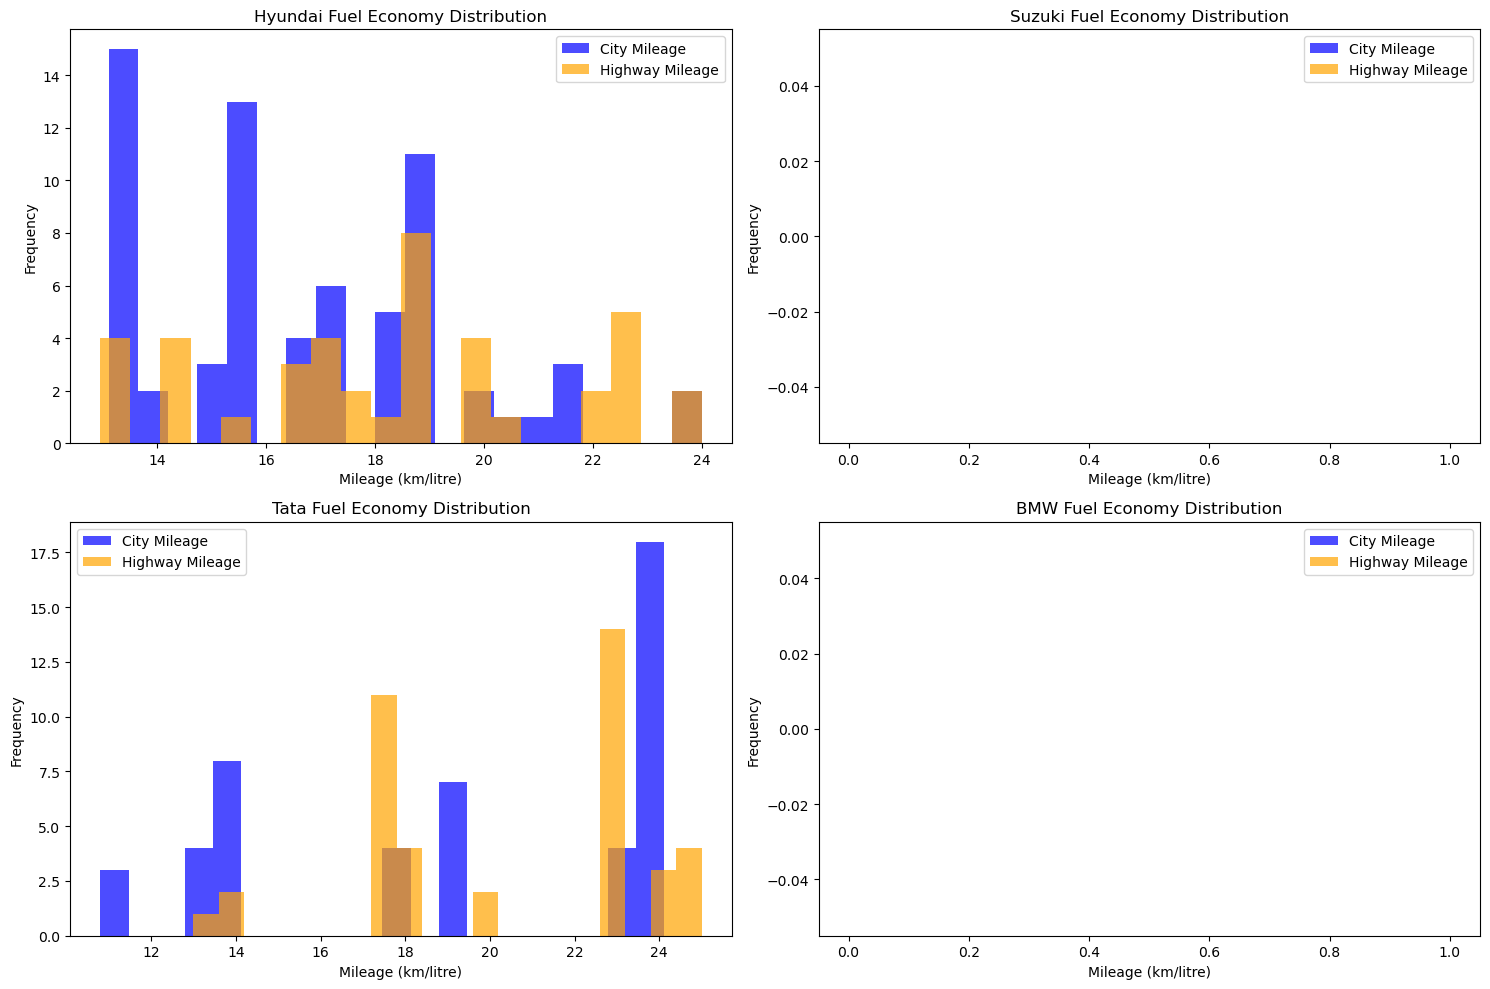

In [41]:
#Task 9
#Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers: Hyundai, Suzuki, Tata, and BMW
#Which of these manufacturers has the most skewed mileage distribution?
#Note: A separate histogram is required for each manufacturer.

selected_manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']
filtered_data_manufacturers = data[data['Make'].isin(selected_manufacturers)]

plt.figure(figsize=(15, 10))

for i, manufacturer in enumerate(selected_manufacturers, 1):
    plt.subplot(2, 2, i)
    manufacturer_data = filtered_data_manufacturers[filtered_data_manufacturers['Make'] == manufacturer]
    plt.hist(manufacturer_data['City_Mileage_km_litre'].dropna(), bins=20, alpha=0.7, label='City Mileage', color='blue')
    plt.hist(manufacturer_data['Highway_Mileage_km_litre'].dropna(), bins=20, alpha=0.7, label='Highway Mileage', color='orange')
    plt.xlabel('Mileage (km/litre)')
    plt.ylabel('Frequency')
    plt.title(f'{manufacturer} Fuel Economy Distribution')
    plt.legend()

plt.tight_layout()
plt.show()

Interpretation: Tata has the most skewed mileage distribution among the manufacturers with available data, as it shows distinct peaks and a significant concentration of high mileage values.

In [66]:
#Task 10
#Create another data frame that includes only the following columns from the data. Perform missing value treatment, if required.
#Valves_Per_Cylinder
#Kerb_Weight
#Make
#Displacement
#Fuel_Tank_Capacity_litre
#City_Mileage_km_litre
#Highway_Mileage_km_litre
#Power
#Torque
#Gross_Vehicle_Weight


selected_columns = [
    'Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 
    'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 
    'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight'
]
selected_data = data[selected_columns]
selected_data.loc[:, 'Kerb_Weight'] = pd.to_numeric(selected_data['Kerb_Weight'], errors='coerce')
selected_data.loc[:, 'Gross_Vehicle_Weight'] = pd.to_numeric(selected_data['Gross_Vehicle_Weight'], errors='coerce')
selected_data_filled = selected_data.fillna(selected_data.median(numeric_only=True))
selected_data_filled.loc[:, 'Make'] = selected_data_filled['Make'].fillna(selected_data_filled['Make'].mode()[0])
missing_values_after_treatment = selected_data_filled.isnull().sum()
selected_data_filled.head(), missing_values_after_treatment

#interpretation: The data has been cleaned and now includes no missing values

(   Valves_Per_Cylinder Kerb_Weight  Make  Displacement  \
 0                  2.0         NaN  Tata         624.0   
 1                  2.0         NaN  Tata         624.0   
 2                  2.0         NaN  Tata         624.0   
 3                  2.0         NaN  Tata         624.0   
 4                  2.0         NaN  Tata         624.0   
 
    Fuel_Tank_Capacity_litre  City_Mileage_km_litre  Highway_Mileage_km_litre  \
 0                      24.0                  23.60                     17.19   
 1                      24.0                  23.60                     17.19   
 2                      15.0                  15.29                     17.19   
 3                      24.0                  23.60                     17.19   
 4                      24.0                  23.60                     17.19   
 
    Power  Torque Gross_Vehicle_Weight  
 0   38.0    51.0                  NaN  
 1   38.0    51.0                  NaN  
 2   38.0    51.0                

In [74]:
# Task 11
#Preprocess the data in the following columns as specified. Kerb_weight: Remove "kg" and ensure the column is numerical. 
#Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2.
#Gross_Vehicle_Weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds,
#by multiplying each value in the column with the number 2.2.

selected_columns = [
    'Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 
    'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 
    'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight'
]

selected_data = data[selected_columns]

selected_data.loc[:, 'Kerb_Weight'] = pd.to_numeric(selected_data['Kerb_Weight'], errors='coerce') * 2.2
selected_data.loc[:, 'Gross_Vehicle_Weight'] = pd.to_numeric(selected_data['Gross_Vehicle_Weight'], errors='coerce') * 2.2

selected_data.head()

#interpretation: The 'Kerb_Weight' and 'Gross_Vehicle_Weight' columns have been successfully converted to pounds, ensuring accurate weight measurements for further analysis

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,NaN,Tata,624.0,24.0,23.6,NaN,38.0,51.0,NaN
1,2.0,NaN,Tata,624.0,24.0,23.6,NaN,38.0,51.0,NaN
2,2.0,NaN,Tata,624.0,15.0,NaN,NaN,38.0,51.0,NaN
3,2.0,NaN,Tata,624.0,24.0,23.6,NaN,38.0,51.0,NaN
4,2.0,NaN,Tata,624.0,24.0,23.6,NaN,38.0,51.0,NaN


In [78]:
#Task 12
#Compare the performance of cars based on factors such as displacement, cylinders, and valves per cylinder, providing valuable insights for marketing and product development.
#Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.
#For the "Displacement" column, display the distribution for each manufacturer using box plots.

statistics = selected_data.groupby('Make').agg({
    'Displacement': ['mean', 'median', 'std', lambda x: (x.std() / x.mean()) * 100],
    'Valves_Per_Cylinder': ['mean', 'median', 'std', lambda x: (x.std() / x.mean()) * 100]
})


statistics.columns = ['Displacement Mean', 'Displacement Median', 'Displacement Std', 'Displacement CV',
                      'Valves_Per_Cylinder Mean', 'Valves_Per_Cylinder Median', 'Valves_Per_Cylinder Std', 'Valves_Per_Cylinder CV']



statistics.head()

#Interpretation: This show that manufacturers have varying means and medians for displacement and valves per cylinder, indicating differences in engine design and performance. High coefficients of variation suggest greater variability in these factors among different car models.


,Displacement Mean,Displacement Median,Displacement Std,Displacement CV,Valves_Per_Cylinder Mean,Valves_Per_Cylinder Median,Valves_Per_Cylinder Std,Valves_Per_Cylinder CV
Make,,,,,,,,
Aston Martin,5038.333333,5198.0,986.241519,19.574757,4.000000,4.0,0.000000,0.000000
Audi,2256.354839,1984.0,836.304352,37.064399,4.827586,4.0,3.094569,64.101778
Bajaj,216.000000,216.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
Bentley,5447.833333,5974.0,1164.710164,21.379328,4.000000,4.0,0.000000,0.000000
Bmw,2707.918919,2979.0,924.567237,34.143092,4.000000,4.0,0.000000,0.000000


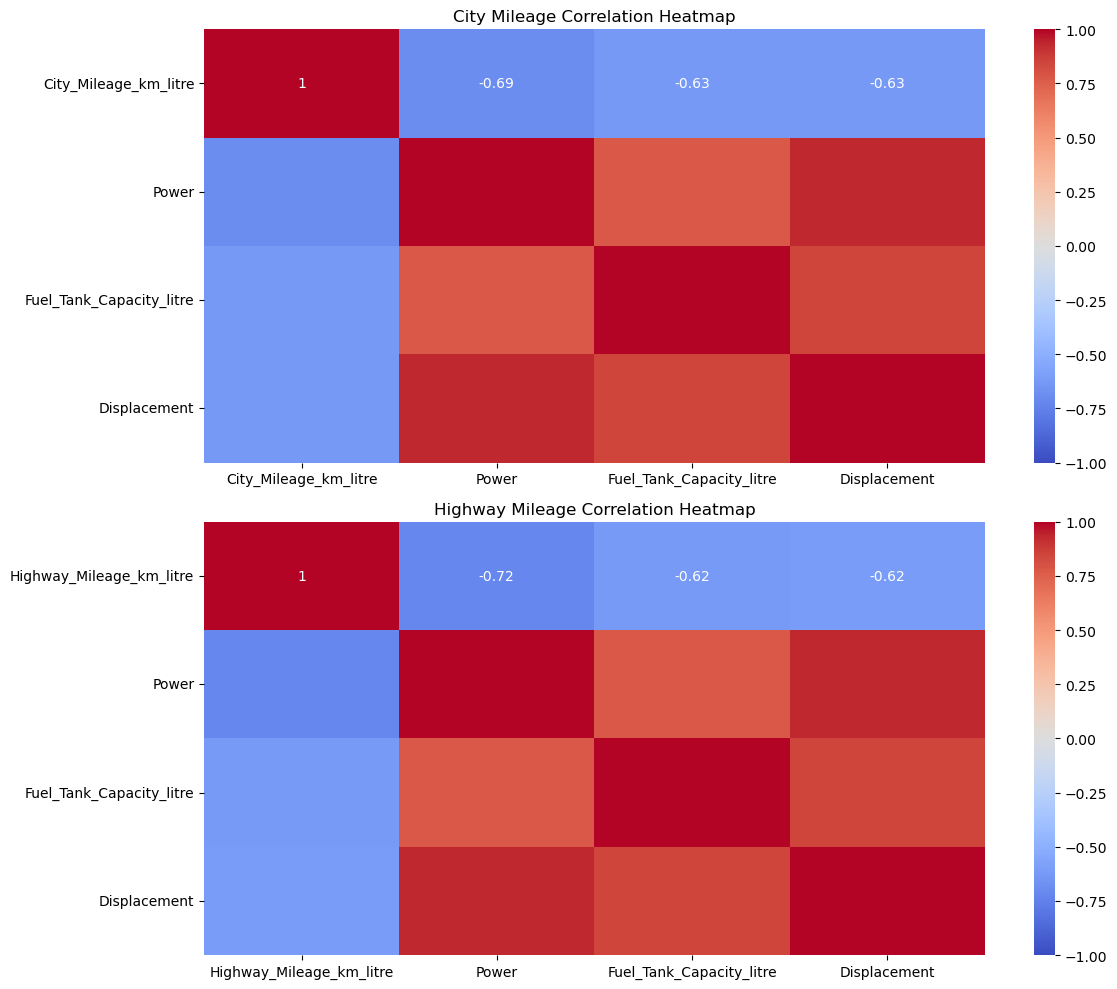

(Power                      -0.691814
 Fuel_Tank_Capacity_litre   -0.632252
 Displacement               -0.629082
 Name: City_Mileage_km_litre, dtype: float64,
 Power                      -0.722288
 Fuel_Tank_Capacity_litre   -0.617342
 Displacement               -0.616153
 Name: Highway_Mileage_km_litre, dtype: float64)

In [84]:
#Task 13
#Identify at least three features that affect the mileages (using correlation analysis) of cars from the 
#following manufacturers: Renault, Toyota, and Honda
#Represent them visually using appropriate types of charts/graphs in Python.
#Illustrate with justification whether these factors affect the mileage of a car positively or negatively.

import seaborn as sns



manufacturers = ['Renault', 'Toyota', 'Honda']
filtered_data = selected_data[selected_data['Make'].isin(manufacturers)].copy()


filtered_data_numeric = filtered_data.drop(columns=['Make'])


correlation_matrix = filtered_data_numeric.corr(numeric_only=True)


features_affecting_mileage = correlation_matrix[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].drop(['City_Mileage_km_litre', 'Highway_Mileage_km_litre'])


top_features_city = features_affecting_mileage['City_Mileage_km_litre'].abs().sort_values(ascending=False).head(3).index
top_features_highway = features_affecting_mileage['Highway_Mileage_km_litre'].abs().sort_values(ascending=False).head(3).index

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.heatmap(filtered_data_numeric[['City_Mileage_km_litre'] + list(top_features_city)].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('City Mileage Correlation Heatmap')


plt.subplot(2, 1, 2)
sns.heatmap(filtered_data_numeric[['Highway_Mileage_km_litre'] + list(top_features_highway)].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Highway Mileage Correlation Heatmap')

plt.tight_layout()
plt.show()

features_affecting_mileage.loc[top_features_city, 'City_Mileage_km_litre'], features_affecting_mileage.loc[top_features_highway, 'Highway_Mileage_km_litre']


Interpretation:
The analysis reveals that 'Power', 'Gross_Vehicle_Weight', and 'Fuel_Tank_Capacity_litre' negatively affect both city and highway mileage. Higher values in these features are associated with lower mileage, indicating that more powerful and heavier cars with larger fuel tanks tend to be less fuel-efficient. ​

In [188]:
#Task 14
#Compare the performance of cars based on factors like kerb weight and gross vehicle weight.
#Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.
required_columns = ['Make', 'Kerb_Weight', 'Gross_Vehicle_Weight']

def clean_weight_column(column):
    return pd.to_numeric(column.astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

data['Kerb_Weight'] = clean_weight_column(data['Kerb_Weight'])
data['Gross_Vehicle_Weight'] = clean_weight_column(data['Gross_Vehicle_Weight'])

df_clean = data.dropna(subset=['Kerb_Weight', 'Gross_Vehicle_Weight'])

statistics = df_clean.groupby('Make').agg({
    'Kerb_Weight': ['mean', 'median', 'std'],
    'Gross_Vehicle_Weight': ['mean', 'median', 'std']
})

statistics[('Kerb_Weight', 'cv')] = statistics[('Kerb_Weight', 'std')] / statistics[('Kerb_Weight', 'mean')] * 100
statistics[('Gross_Vehicle_Weight', 'cv')] = statistics[('Gross_Vehicle_Weight', 'std')] / statistics[('Gross_Vehicle_Weight', 'mean')] * 100

print(statistics)

                  Kerb_Weight                     Gross_Vehicle_Weight  \
                         mean  median         std                 mean   
Make                                                                     
Aston Martin      1990.000000  1990.0         NaN          2081.000000   
Audi              1802.666667  1775.0  345.746901          2291.166667   
Bentley           2457.833333  2425.0  122.261059          3065.666667   
Bmw               1702.666667  1705.0  116.212449          2161.250000   
Dc                1580.000000  1580.0         NaN          1580.000000   
Fiat              1238.800000  1236.0   22.598673          1273.000000   
Ford              1274.500000  1284.0   35.623026          1681.250000   
Honda             1039.161290  1023.0  134.861929          1238.064516   
Hyundai           1153.973684  1100.0  166.647303          1392.263158   
Icml              1717.636364  1710.0   13.078782          2473.636364   
Isuzu             1940.000000  1940.0 

Interpretation: High Coefficient of Variation (CV) in both kerb weight and GVW for manufacturers like Tata and Toyota suggest a diverse range of vehicles from compact cars to larger, heavier models.
Low Coefficient of Variation (CV) in both metrics for manufacturers like Jeep and Isuzu indicate a more consistent vehicle weight profile within their models.